# **Python Data Analyses and Visualization** 
# **Applied to European city data**

**<center>Ruthger Righart</center>**
<center><font color="blue">rrighart@googlemail.com</font></center>

## **<a name="contents">Contents</a>**

1. [Introduction](#q1)
2. [Jupyter notebook and loading packages](#q2)
3. [Create a DataFrame manually](#q3) <font color="gray">[pd.DataFrame, head, tail]</font>
4. [Selecting rows and columns](#q4) <font color="gray">[loc, ix]</font>
5. [Data types](#q5) <font color="gray">[type, dtypes, astype]</font>
6. [Basic properties](#q6) <font color="gray">[columns, index, values, shape, len]</font>
7. [Load another DataFrame](#q7) <font color="gray">[pd.read_csv, value_counts]</font>
8. [Append two DataFrames](#q8) <font color="gray">[append, pd.concat]</font>
9. [Missing values](#q9) <font color="gray">[pd.isnull, count, dropna, describe]</font>
10. [Sorting the DataFrame](#q10) <font color="gray">[sort_index, sort_values]</font>
11. [Data selection by position](#q11) <font color="gray">[iloc]</font>
12. [Conditional data selection](#q12) <font color="gray">[>,==,!=,&,^,|]</font>
13. [Selection based on string](#q13) <font color="gray">[str.contains]</font>
14. [Adding single rows](#q14) <font color="gray">[loc, pd.Series, append]</font>
15. [Exploratory analyses using boxplots](#q15) <font color="gray">[describe, Matplotlib boxplot]</font>
16. [Barplots](#q16) <font color="gray">[Matplotlib]</font>
17. [Pie Charts](#q17) <font color="gray">[Matplotlib, Plotly]</font>
18. [Scatterplots](#q18) <font color="gray">[Matplotlib]</font>
19. [Replacing values](#q19) <font color="gray">[replace]</font>
20. [Data categorization](#q20) <font color="gray">[pd.cut, pd.value_counts, Matplotlib histogram, groupby]</font> 
21. [Data conversions](#q21) <font color="gray">[loc, def]</font>
22. [Merging data](#q22) <font color="gray">[pd.merge]</font>
23. [More scatterplots](#q23) <font color="gray">[Matplotlib, Seaborn]</font>
24. [Geographical mapping](#q24) <font color="gray">[np.where, basemap]</font>
25. [Lineplots](#q25) <font color="gray">[sort_values, Matplotlib]</font>
26. [Remove rows and columns](#q26) <font color="gray">[del, drop]</font>
27. [Save DataFrame](#q27) <font color="gray">[to_csv]</font>

## **<a name="q1">1. Introduction</a>**

Cities are interesting. Some people enjoy living in cities, others tend to avoid them and rather prefer the countryside. Whatever is your preference, one thing is true: Cities generate a huge amount of data that are good source for analyses.

The following is a brief tutorial to get quick insight into Python data analyses and visualization. It is meant to be an introduction for beginners<sup>1</sup>. Much of this is already documented on the web, and sometimes with more detail. So why another guide?

Many guides treat every topic separately and use new datasets everytime a new data problem is presented. There are however advantages of using the same dataset for learning a large variety of analyses. One advantage is time-related, in that all attention can be focused on coding without losing "switching" time understanding new datasets. More importantly, working on a single dataset one experiences the evolution from preprocessing till visualization.

The goal of this tutorial is not to solve an important data science problem. For this, anyways, the presented data is too small. The goal is to use an intuitive dataset to learn Python, intuitive in the sense that it contains data that everyone can understand without prior domain knowledge. It should therefore be suitable for someone who is a starter in Data Science. 

We start this tutorial creating data, loading data, data munging and in the end several visualizations. Do not hesitate to contact me if you have any questions or suggestions: <font color="blue">rrighart@googlemail.com</font>

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q2">2. Jupyter notebook and loading packages</a>**

First start up IPython or Jupyter notebook. An installation guide can be found at the following page<sup>2</sup>. 

The current tutorial treats a great variety of data types, various preprocessing steps (for ex.: selecting data, merging data, replacing data, finding missing values), data visualization (for ex.: boxplots, barplots, pie-charts, geographic mapping), from different packages (for ex. Matplotlib, Seaborn, Plotly).

In Python, several abbreviations are used, such as <font color="blue">pd</font> for Pandas, <font color="blue">np</font> for numpy etc. The abbreviations you can use for imported packages are arbitrary, but in this tutorial I used those that are used most commonly on platforms such as StackOverflow. The following packages are needed throughout the tutorial.

In [1]:
import os
import csv
import pandas as pd
import numpy as np
from datetime import datetime

The packages here below are needed for visualizations, such as Matplotlib, Seaborn, and Plotly:

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

/home/mark/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


The following packages will be used for geographic mapping:

In [3]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from geopy.geocoders import Nominatim
import math

There is no problem of continuity when any of the visualizations or geographic mapping are skipped.

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q3">3. Create a DataFrame manually </a>**

We are going to use data from European cities, consisting of categorical and numerical data. The data were obtained from Wikipedia. *Temperatures* are daily means in Celsius. *Population* is urban population. *Altitude* is the highest level reported.

We are going to create a DataFrame manually, later we will see how to load a DataFrame. After typing the following code, your DataFrame <font color="red">df1</font> is created.

In [4]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna'],
        'Temp_Jan': [3.4, 11.8, 5.0, 1.5, 0.3, 9.9, 1.2],
        'Temp_Jul': [17.6, 25.7, 20.6, 20.2, 19.4, 28.5, 19.1],
        'Language': ['Dutch', 'Catalan and Spanish', 'French', 'French', 'German', 'Greek', 'German'],
        'Altitude': [-2, 12, np.nan, 375, 520, 338, 542],
        'MeasureDate':[np.nan, np.nan, '01-01-2013', '01-12-2015', '31-12-2015', np.nan, '01-01-2017'],
        'Population': [1351587,4740000,10601122,198072,1450381, 3090508, 2600000]}
df1 = pd.DataFrame(data, columns = ['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude','MeasureDate', 'Population'])

Inspecting the data will show us the following table. From now on, often the code <font color="blue">.head()</font> will be used. By default the first five rows are shown. Putting any number inbetween the parentheses will change the number of rows. The command <font color="blue">.tail()</font> does exactly the same but starting from the end.

In [5]:
df1.head(4)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaN,4740000
2,Paris,5.0,20.6,French,NaN,01-01-2013,10601122
3,Geneva,1.5,20.2,French,375.0,01-12-2015,198072


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q4">4. Selecting rows and columns</a>**

To select only one column or variable, use the following:

In [6]:
df1['Temp_Jan'].head(3)

0     3.4
1    11.8
2     5.0
Name: Temp_Jan, dtype: float64

Another notation that is used and that gives the same result:

In [7]:
df1.Temp_Jan.head(3)

0     3.4
1    11.8
2     5.0
Name: Temp_Jan, dtype: float64

If you desire selecting multiple columns, do the following:

In [8]:
df1.loc[:,['Temp_Jan','Temp_Jul']].head(3)

,Temp_Jan,Temp_Jul
0,3.4,17.6
1,11.8,25.7
2,5.0,20.6


To select a row, for example the first row, do the following. Python starts indexing from 0 (0=first row, 1=second row, etc.):

In [9]:
df1.ix[0]

Place          Amsterdam
Temp_Jan             3.4
Temp_Jul            17.6
Language           Dutch
Altitude              -2
MeasureDate          NaN
Population       1351587
Name: 0, dtype: object

To select the first column:

In [10]:
df1[[0]].head(3)

,Place
0,Amsterdam
1,Barcelona
2,Paris


To select multiple rows:

In [11]:
df1[0:2]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaN,4740000


Or use the following code:

In [12]:
df1.ix[[0,1]]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaN,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaN,4740000


To select multiple columns:

In [13]:
df1[[0,1]].head(3)

,Place,Temp_Jan
0,Amsterdam,3.4
1,Barcelona,11.8
2,Paris,5.0


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q5">5. Data types</a>**

To check the data type of <font color="red">df1</font>.

In [14]:
type(df1)

pandas.core.frame.DataFrame

Or to check the variable types:

In [15]:
df1.dtypes

Place           object
Temp_Jan       float64
Temp_Jul       float64
Language        object
Altitude       float64
MeasureDate     object
Population       int64
dtype: object

Convert the variable *Language* into a categorical variable.

In [16]:
df1['Language'] = df1['Language'].astype('category')

After this we need to verify if we have gotten the right type.

In [17]:
df1['Language'].dtypes

category

Now we change the column <font color="red">MeasureDate</font> to a date variable

In [18]:
df1['MeasureDate'].dtypes

dtype('O')

In [19]:
df1['MeasureDate']=pd.to_datetime(df1['MeasureDate'])

In [20]:
df1['MeasureDate'].dtypes

dtype('<M8[ns]')

In [21]:
df1.dtypes

Place                  object
Temp_Jan              float64
Temp_Jul              float64
Language             category
Altitude              float64
MeasureDate    datetime64[ns]
Population              int64
dtype: object

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q6">6. Basic properties</a>**

The DataFrame can be dissected in its column- and rownames, and the values inside:

In [22]:
df1.columns

Index([u'Place', u'Temp_Jan', u'Temp_Jul', u'Language', u'Altitude',
       u'MeasureDate', u'Population'],
      dtype='object')

In [23]:
df1.index

RangeIndex(start=0, stop=7, step=1)

In [24]:
df1.values

array([['Amsterdam', 3.4, 17.6, 'Dutch', -2.0, NaT, 1351587],
       ['Barcelona', 11.8, 25.7, 'Catalan and Spanish', 12.0, NaT, 4740000],
       ['Paris', 5.0, 20.6, 'French', nan,
        Timestamp('2013-01-01 00:00:00'), 10601122],
       ['Geneva', 1.5, 20.2, 'French', 375.0,
        Timestamp('2015-01-12 00:00:00'), 198072],
       ['Munich', 0.3, 19.4, 'German', 520.0,
        Timestamp('2015-12-31 00:00:00'), 1450381],
       ['Athens', 9.9, 28.5, 'Greek', 338.0, NaT, 3090508],
       ['Vienna', 1.2, 19.1, 'German', 542.0,
        Timestamp('2017-01-01 00:00:00'), 2600000]], dtype=object)

And if we wanted to select the first column name, the following can be done:

In [25]:
df1.columns[0]

'Place'

The size of the DataFrame can be appreciated by the <font color="blue">shape</font> command:

In [26]:
df1.shape

(7, 7)

And the length of the DataFrame, or in other words, the number of rows, by the <font color="blue">len</font> command:

In [27]:
len(df1)

7

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q7">7. Load another DataFrame</a>**

We created a fairly small dataset. Most of the times it is possible to load data from a file.
In the following section we will see how to load data using <font color="blue">pd.read_csv</font>.
The file is from my [GitHub page](https://github.com/RRighart/City).
CSV means that a file containing *comma separated values* is expected.
An important remark: When loading a file, one needs to carefully check if the decimals are dots or commas (this can differ between countries and systems).<sup>3</sup>


In [28]:
url = 'https://raw.githubusercontent.com/RRighart/City/master/df2.csv'
df2 = pd.read_csv(url, parse_dates=True, delimiter=",", decimal=",")

So this should give the following data of cities:

In [29]:
df2.head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Stockholm,-1.6,18.8,Swedish,0.0,NaT,1515017
1,Oslo,-2.9,17.7,Norwegian,23.0,2016-01-01,942084
2,Helsinki,-3.9,17.8,Finnish,NaN,2016-03-31,1231595


The columns *Language* and *MeasureDate* are not the right class. So it would be best to change this directly.

In [30]:
df2.dtypes

Place           object
Temp_Jan       float64
Temp_Jul       float64
Language        object
Altitude       float64
MeasureDate     object
Population       int64
dtype: object

Language should be of type "category".

In [31]:
df2['Language'] = df2['Language'].astype('category')

MeasureDate should be of type "datetime".

In [32]:
df2['MeasureDate']=pd.to_datetime(df2['MeasureDate'])

In [33]:
df2.dtypes

Place                  object
Temp_Jan              float64
Temp_Jul              float64
Language             category
Altitude              float64
MeasureDate    datetime64[ns]
Population              int64
dtype: object

For categorical variables, it is essential to know the frequency of each category.
Note that a slightly different notation, namely <font color="gray">df2['Language'].value_counts()</font>, works here as well.

In [34]:
df2.Language.value_counts()

French        3
English       3
Swedish       2
Turkish       1
Spanish       1
Portuguese    1
Norwegian     1
Italian       1
Finnish       1
Dutch         1
Croatian      1
Name: Language, dtype: int64

If loading the data did not work, another indirect way is loading the data manually from my GitHub page: https://github.com/RRighart/City . Then check that the data are saved in your current directory.
Use the following to check the path:

In [35]:
os.getcwd()

'/home/mark/Dokumente/Ruthger/Python'

Using the command <font color="blue">os.listdir(os.curdir)</font> will produce a list of files that is in your directory. Now it is possible to verify if your copied .csv file is really in the right folder. To change the directory you can use the command <font color="blue">os.chdir('path')</font>.

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q8">8. Append two DataFrames</a>**

It is often the case that data are acquired from disparate sources, like we have here.
So now the trick is to bind the two sets together.

In [36]:
df = df1.append(df2, ignore_index=True)

Displaying the whole DataFrame <font color="red">df</font> now we can see that there are 23 rows.

In [37]:
df

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
2,Paris,5.0,20.6,French,NaN,2013-01-01,10601122
3,Geneva,1.5,20.2,French,375.0,2015-01-12,198072
4,Munich,0.3,19.4,German,520.0,2015-12-31,1450381
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508
6,Vienna,1.2,19.1,German,542.0,2017-01-01,2600000
7,Stockholm,-1.6,18.8,Swedish,0.0,NaT,1515017
8,Oslo,-2.9,17.7,Norwegian,23.0,2016-01-01,942084
9,Helsinki,-3.9,17.8,Finnish,NaN,2016-03-31,1231595


Another way this can be done is by the <font color="blue">pd.concat</font> function<sup>4</sup>:

In [38]:
pd.concat([df1, df2], ignore_index=True).head(4)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
2,Paris,5.0,20.6,French,NaN,2013-01-01,10601122
3,Geneva,1.5,20.2,French,375.0,2015-01-12,198072


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q9">9. Missing values</a>**

One of the first data inspections is if and where there are missing values (data that are not available for various reasons). As we can see, there are missing values in the data; missing values are labeled differently in Python for numeric data (NaN) and dates (NaT)<sup>5</sup>. First let's see how to detect where missing values occur.

The following command will indicate those cells with "True" where there is a missing value.

In [39]:
pd.isnull(df).head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False


The cells that mention "True" are missing values. They only occur for *Altitude* and *MeasureDate*.
It is also possible to inspect specific variables, just to avoid the output of the whole datasheet. 

In [40]:
pd.isnull(df['Altitude']).head(5)

0    False
1    False
2     True
3    False
4    False
Name: Altitude, dtype: bool

There is a simple way to check the *number* of missing values per variable, using the <font color="blue">is.null</font> function.

In [41]:
df.isnull().sum()

Place           0
Temp_Jan        0
Temp_Jul        0
Language        0
Altitude        6
MeasureDate    14
Population      0
dtype: int64

The inverse is also possible, that is counting the number of nonmissing values.

In [42]:
df.count()

Place          23
Temp_Jan       23
Temp_Jul       23
Language       23
Altitude       17
MeasureDate     9
Population     23
dtype: int64

Statistics could be computed while ignoring the missing values. Another possibility is to drop the row(s) that contains *any* missing value, using <font color="gray">df.dropna(how='any')</font>. If you put <font color="gray">how='all'</font> it will only drop the row(s) if all values are missing. Note that only writing it to <font color="red">df</font> will change the DataFrame. So if <font color="gray">df = df.dropna(how='any')</font> were used, the DataFrame <font color="red">df</font> would have changed.

In [43]:
df.dropna(how='any')

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
3,Geneva,1.5,20.2,French,375.0,2015-01-12,198072
4,Munich,0.3,19.4,German,520.0,2015-12-31,1450381
6,Vienna,1.2,19.1,German,542.0,2017-01-01,2600000
8,Oslo,-2.9,17.7,Norwegian,23.0,2016-01-01,942084
10,Lulea,-5.1,20.7,Swedish,6.0,2014-12-31,75966
22,Istanbul,5.7,22.9,Turkish,39.0,2016-12-31,14657434


Missing values are automatically omitted from summary statistics, such as <font color="blue">describe()</font>.

In [44]:
df['Altitude'].describe()

count     17.000000
mean     122.941176
std      191.653160
min       -2.000000
25%        1.000000
50%       23.000000
75%      140.000000
max      542.000000
Name: Altitude, dtype: float64

It is possible to replace values with NaNs that fulfill a certain condition, for example if *Altitude* is larger than 500 m. It is adviced to refrain from using chain indices, such as <font color="gray">df['Altitude'][df['Altitude']>350]=np.nan</font><sup>6</sup>

In [45]:
df.loc[df['Altitude']>350, 'Altitude'] = np.nan 

In [46]:
df['Altitude']

0      -2.0
1      12.0
2       NaN
3       NaN
4       NaN
5     338.0
6       NaN
7       0.0
8      23.0
9       NaN
10      6.0
11     47.0
12    140.0
13      NaN
14      NaN
15      NaN
16      NaN
17     11.0
18      0.0
19      1.0
20     38.0
21      0.0
22     39.0
Name: Altitude, dtype: float64

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q10">10. Sorting the DataFrame</a>**

The columns of a DataFrame can be alphabetically sorted on the column name. For this we use <font color="blue">sort_index</font> with <font color="blue">axis=1</font>, and <font color="blue">ascending=True</font>.

In [47]:
df.sort_index(axis=1, ascending=True).head(3)

,Altitude,Language,MeasureDate,Place,Population,Temp_Jan,Temp_Jul
0,-2.0,Dutch,NaT,Amsterdam,1351587,3.4,17.6
1,12.0,Catalan and Spanish,NaT,Barcelona,4740000,11.8,25.7
2,NaN,French,2013-01-01,Paris,10601122,5.0,20.6


It is also possible to sort the rows based on a certain column, using <font color="blue">sort_values</font>. If the column is a string, it is sorted alphabetically. If the column is numeric, it is ranked according to value. For example, in the following the DataFrame is sorted alphabetically on *Place*, and the result is written to <font color="red">df</font>.

In [48]:
df = df.sort_values(by='Place')

Displaying the first five rows we can confirm that the sorting worked.

In [49]:
df.head(5)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
20,Ajaccio,9.0,22.9,French,38.0,NaT,68587
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587
14,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01,517042
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q11">11. Data selection by position</a>**

It is sometimes important to inspect specific cells. For example, if you need to look up the data that is in the first row, first column, you could do the following:

In [50]:
df.iloc[0,0]

'Ajaccio'

If you want to have multiple rows and columns, the following can be done:

In [51]:
df.iloc[:3,:2]

,Place,Temp_Jan
20,Ajaccio,9.0
0,Amsterdam,3.4
14,Antwerp,3.4


Select rows within a given range, for example first till fourth column, and second till third row.

In [52]:
df.iloc[1:3,0:4]

,Place,Temp_Jan,Temp_Jul,Language
0,Amsterdam,3.4,17.6,Dutch
14,Antwerp,3.4,18.5,Dutch


For selecting certain columns, but switching the position of the second and third

In [53]:
df.iloc[:,[1,3,2]].head(5)

,Temp_Jan,Language,Temp_Jul
20,9.0,French,22.9
0,3.4,Dutch,17.6
14,3.4,Dutch,18.5
5,9.9,Greek,28.5
1,11.8,Catalan and Spanish,25.7


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q12">12. Conditional data selection</a>**

There are circumstances in which you'd only want to select cases that fulfill a certain condition.
The following only selects data if the average temperature in January is higher than 9 degrees Celsius:

In [54]:
df[df.Temp_Jan > 9]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
17,Malaga,12.1,25.5,Spanish,11.0,NaT,569130
18,Porto,9.5,20.6,Portuguese,0.0,NaT,1774000


Select cases where the average July temperature was equal to 28.5.

In [55]:
df[df.Temp_Jul == 28.5]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508


Select cases if July temperature was unequal to 28.5.

In [56]:
df[df.Temp_Jul != 28.5].head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
20,Ajaccio,9.0,22.9,French,38.0,NaT,68587
0,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587
14,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01,517042


It is also possible to select data that fulfill *multiple* conditions, for example cities where the January temperature is larger than 5 *and* the July temperature is smaller than 17 degrees Celsius.

In [57]:
df[(df.Temp_Jan > 5) & (df.Temp_Jul < 17)]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
13,Cork,5.6,15.3,English,NaN,NaT,208669


The following selects the data if *either* January temperature is larger than 5 *or* July temperature is smaller than 17. Note that Cork is not selected in this case, since it fulfills both conditions.

In [58]:
df[(df.Temp_Jan > 5) ^ (df.Temp_Jul < 17)]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
20,Ajaccio,9.0,22.9,French,38.0,NaT,68587
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
12,Birmingham,6.7,21.3,English,140.0,NaT,2440986
16,Bordeaux,6.6,21.4,French,NaN,NaT,851071
11,Edinburgh,7.0,19.1,English,47.0,NaT,1339380
22,Istanbul,5.7,22.9,Turkish,39.0,2016-12-31,14657434
17,Malaga,12.1,25.5,Spanish,11.0,NaT,569130
18,Porto,9.5,20.6,Portuguese,0.0,NaT,1774000
21,Rijeka,5.8,23.1,Croatian,0.0,NaT,213666


The following includes the Cork case. It select the data if January temperature is larger than 5 *and/or* July temperature is smaller than 17. That, means it also includes those cases that fulfill both cases.

In [59]:
df[(df.Temp_Jan > 5) | (df.Temp_Jul < 17)]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
20,Ajaccio,9.0,22.9,French,38.0,NaT,68587
5,Athens,9.9,28.5,Greek,338.0,NaT,3090508
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
12,Birmingham,6.7,21.3,English,140.0,NaT,2440986
16,Bordeaux,6.6,21.4,French,NaN,NaT,851071
13,Cork,5.6,15.3,English,NaN,NaT,208669
11,Edinburgh,7.0,19.1,English,47.0,NaT,1339380
22,Istanbul,5.7,22.9,Turkish,39.0,2016-12-31,14657434
17,Malaga,12.1,25.5,Spanish,11.0,NaT,569130
18,Porto,9.5,20.6,Portuguese,0.0,NaT,1774000


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q13">13. Selection based on string</a>**

Imagine that you have a very large dataset, and you wanted to check data for the city Paris.
Of course by alphabetically arranging the data (as we have done) it is not that difficult to find back the data. But in some cases you would need a search function. 
To select a row based on a value in a *categorical* variable. So if we want to find back the "Paris" data, do the following:

In [60]:
df[df['Place'].str.contains('Paris')]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
2,Paris,5.0,20.6,French,NaN,2013-01-01,10601122


And it also work if you are only using part of a string, for example "Stock"

In [61]:
df[df['Place'].str.contains('Stock')]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
7,Stockholm,-1.6,18.8,Swedish,0.0,NaT,1515017


Another example, searching for "Spanish" gives the following hits:

In [62]:
df[df['Language'].str.contains('Spanish')]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
1,Barcelona,11.8,25.7,Catalan and Spanish,12.0,NaT,4740000
17,Malaga,12.1,25.5,Spanish,11.0,NaT,569130


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q14">14. Adding single rows</a>**

Data can be added manually as well. Adding a row can be done in at least two ways:

First, we use <font color="blue">df.loc</font> to add a row at the right index, using <font color="blue">len(df)+1</font>, which takes the lenght of the DataFrame plus one. So this always places the new row at the end.

In [63]:
df.loc[len(df)+1,:]=['Rome', 7.5, 24.1, 'Italian', 21, np.nan, 4353775]

As we will see the new entry "Rome" is added in the last row.

In [64]:
df.tail(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
19,Venice,3.3,23.0,Italian,1.0,NaT,264579.0
6,Vienna,1.2,19.1,German,NaN,2017-01-01,2600000.0
24,Rome,7.5,24.1,Italian,21.0,NaT,4353775.0


A second way to do this is by using <font color="blue">append</font>. We first make <font color="red">newrow</font>:

In [65]:
newrow = pd.Series(['Madrid', 6.3, 25.6, 'Spanish', 667, np.nan, 6240000], index= ['Place', 'Temp_Jan', 'Temp_Jul', 'Language', 'Altitude', 'MeasureDate', 'Population'])

In [66]:
type(newrow)

pandas.core.series.Series

In [67]:
newrow

Place           Madrid
Temp_Jan           6.3
Temp_Jul          25.6
Language       Spanish
Altitude           667
MeasureDate        NaN
Population     6240000
dtype: object

If we have created the row, we use <font color="blue">append</font>. 

In [68]:
df = df.append(newrow, ignore_index=True)

In [69]:
df.tail(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
22,Vienna,1.2,19.1,German,NaN,2017-01-01 00:00:00,2600000.0
23,Rome,7.5,24.1,Italian,21.0,NaT,4353775.0
24,Madrid,6.3,25.6,Spanish,667.0,NaN,6240000.0


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q15">15. Exploratory analyses using boxplots</a>**

To have a summary of a variable, use the <font color="blue">describe()</font> command. Note that median is the *50%* indicator.
It is also possible to use for ex. <font color="blue">min()</font>, <font color="blue">mean()</font>, <font color="blue">median()</font> and other stats separately. From these statistics it is directly clear that in July temperature is higher than January (not unexpected for European countries).

In [70]:
df['Temp_Jan'].describe()

count    25.000000
mean      4.468000
std       4.630759
min      -5.100000
25%       1.500000
50%       5.600000
75%       7.000000
max      12.100000
Name: Temp_Jan, dtype: float64

In [71]:
df['Temp_Jul'].describe()

count    25.000000
mean     21.120000
std       3.147353
min      15.300000
25%      18.800000
50%      20.600000
75%      23.000000
max      28.500000
Name: Temp_Jul, dtype: float64

We are going to create boxplots using Matplotlib. Before running any code, we make sure that the plot layout is reset to the origin. As you will see later, we are going to use Seaborn, and this may change the layout of other plots<sup>7</sup>

In [72]:
sns.reset_orig()

Boxplots can be used to check for outliers and distribution of the variables.
To position the two boxplots, <font color="blue">fig.add_subplot(a,b,c)</font> is used, where *a* is number of rows, *b* is the number of columns, and *c* is the position that increments rowwise. 

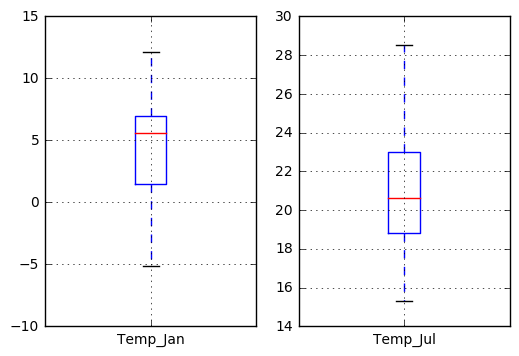

In [73]:
fig = plt.figure()

fig.add_subplot(1,2,1)
df[['Temp_Jan']].boxplot(sym='.')
fig.add_subplot(1,2,2)
df[['Temp_Jul']].boxplot(sym='.')
plt.show()

Not bad these plots. Matplotlib gives a quick insight on data distribution and possible outliers. But the range of the axes are different for the two plots, and unnecessary space is wasted for two y-axes. So the question arises if we could change this.

First, we are going to select the two columns and make a new temporary DataFrame called <font color="red">temp</font>.

In [74]:
temp = df.iloc[:,[1,2]]

Second, we'd like to adapt our columnnames slightly, and the following code does that:

In [75]:
temp.columns = ['January','July']

The following code puts the two boxplots in one figure. We could add a line <font color="blue">plt.ylim</font> to adjust the range of the y-axis.

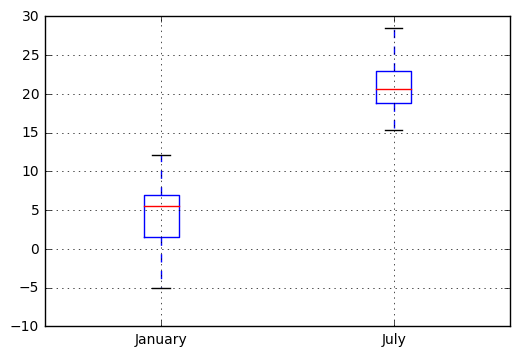

In [76]:
temp.boxplot(sym='.')
plt.ylim(-10, 30)
plt.show()

In the following another boxplot is produced, now for the Altitude. Note that some of the parameter settings are changed, such as <font color="blue">sym='bo'</font>, which means that blue filled dots are used for the outliers; <font color="blue">vert=0</font> means that a horizontal boxplot is used; <font color="blue">width</font> adapts the width of the box; <font color="blue">patch_artist=True</font> fills the box with a color.
Making a boxplot for Altitude shows there are some outliers. In certain contexts outliers can be data errors, because of for example human errors entering data, machine failure etc. These altitudes are a good example that not all outliers are data errors.

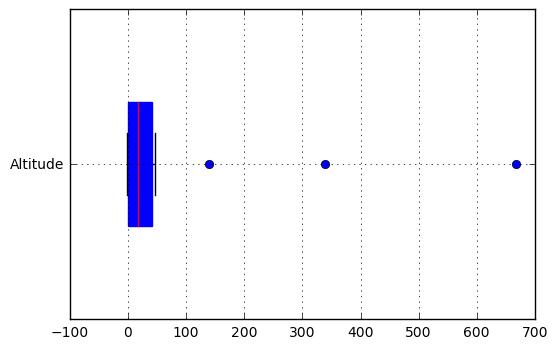

In [77]:
fig = plt.figure()
df[['Altitude']].boxplot(sym='bo', widths = 0.4, patch_artist = True, vert=0)
flierprops = dict(markersize=9)
plt.show()

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q16">16. Barplots </a>**

Using horizontal bars one can get a quick impression of the temperatures and the differences and variation across cities, as well as the differences between winter- (January = dark blue) and summertime (July = light blue). This has been done in the code below.
<font color="gray">Df.sort_values(by='Temp_Jan', ascending=False)</font> is used to order the bars.
In <font color="blue">plt.legend()</font> it is possible to change parameters that determine the location of the legend, such as <font color="blue">bbox_to_anchor</font>. The parameter <font color="blue"> mode=expand</font> makes that the legend box takes similar width as the plot<sup>8</sup>.
The data are ordered on January temperature, starting with the city with the lowest temperatures, which is Lulea, situated in the very north of Sweden.

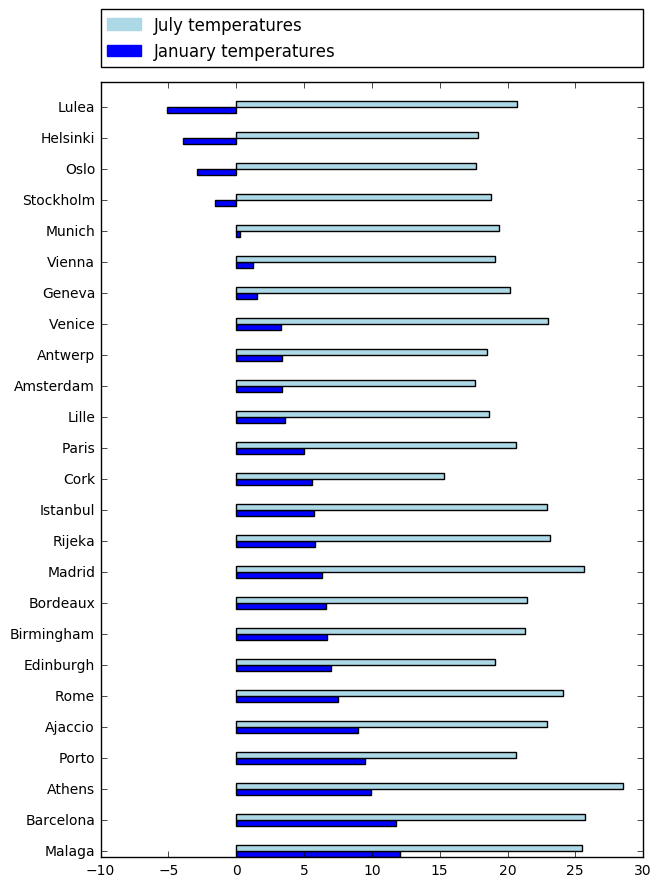

In [78]:
plt.figure(figsize = (7, 10))
barwd = 0.2
r1=range(len(df))
r2=[y+ barwd for y in r1]
plt.barh(r1, df.sort_values(by='Temp_Jan', ascending=False).Temp_Jan, height = barwd, color = 'blue')
plt.barh(r2, df.sort_values(by='Temp_Jan', ascending=False).Temp_Jul, height = barwd, color = 'lightblue')
plt.yticks([s + barwd for s in range(len(df))], df.sort_values(by='Temp_Jan', ascending=False).Place,
  rotation = 0)
lightblue_patch = mpatches.Patch(color='lightblue', label='July temperatures')
blue_patch = mpatches.Patch(color='blue', label='January temperatures')
plt.legend(handles=[lightblue_patch, blue_patch], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q17">17. Pie Charts</a>**

To appreciate the different population sizes, we can benefit from a pie chart.
As can be directly seen, the pie becomes dense because of the quantity of data, and a smart use of colors is desired<sup>9</sup>. The parameter <font color="blue">cs</font> is used for color scaling.
The resulting chart shows that Istanbul and Paris are clearly among the largest cities that are in our dataset.

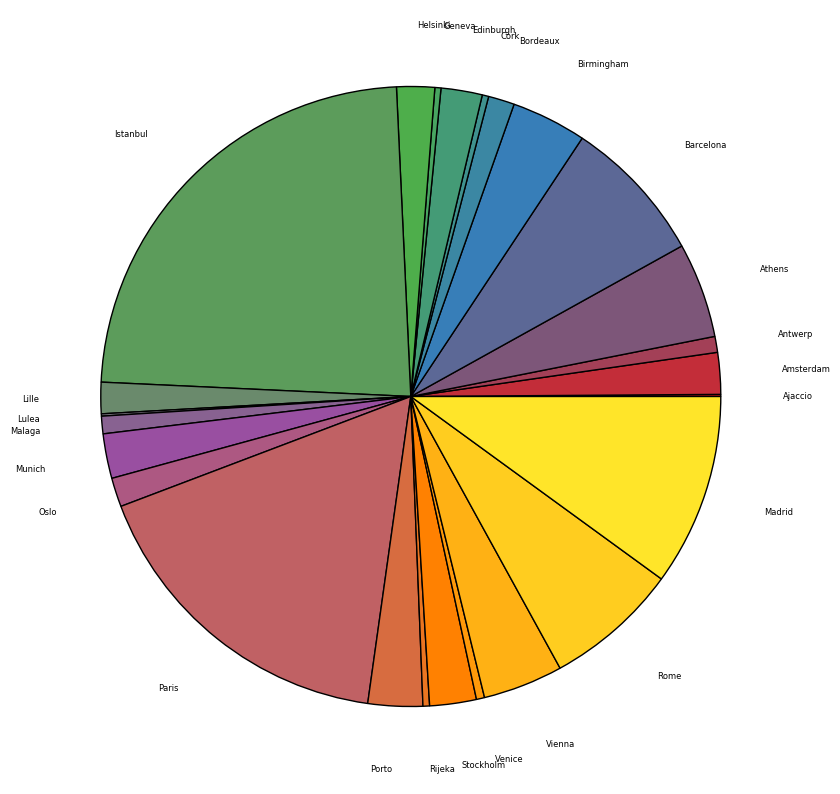

In [79]:
cs = cm.Set1(np.arange(40)/40.)
mpl.rcParams['font.size'] = 6.0
plt.figure(figsize = (10, 10))
x = df.Population
plt.pie(x, labels = df.Place, labeldistance = 1.2, colors = cs)
plt.show()

To deal partly with the density, it it possible to print the labels in a legend outside the pie.
Just pass the argument <font color="blue">labels=df.Place</font> directly to <font color="blue">pyplot.legend()</font>. Use the <font color="blue">bbox_to_anchor()</font> argument to place the legend just outside the figure.

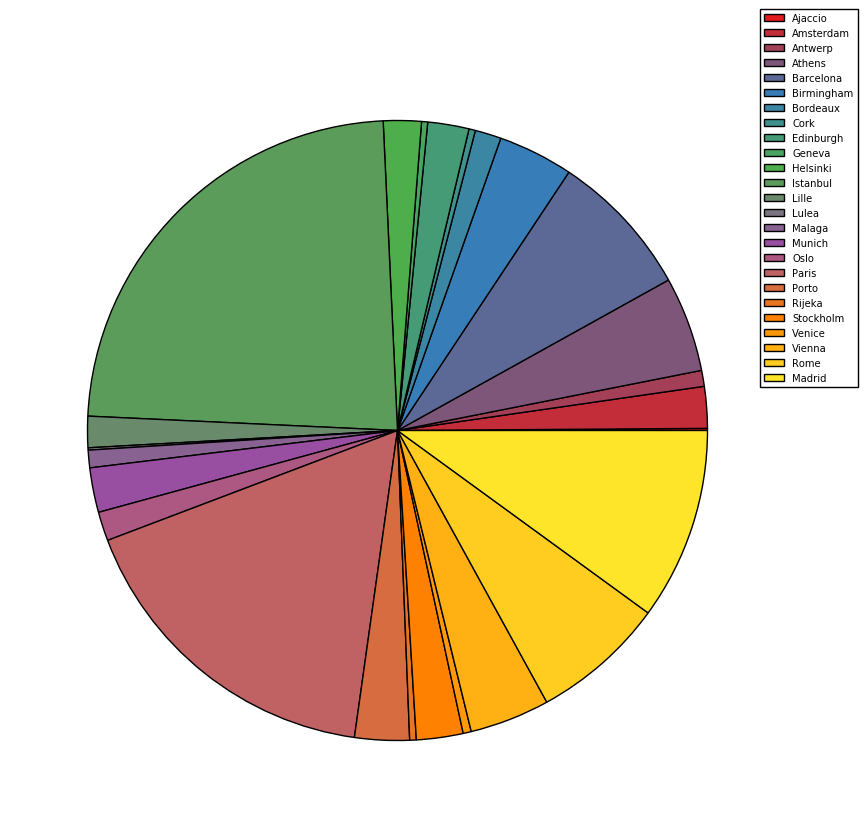

In [80]:
mpl.rcParams['font.size'] = 6.0
plt.figure(figsize = (10, 10))
x = df.Population
plt.pie(x, colors = cs)
plt.legend(labels = df.Place, bbox_to_anchor=(1.1, 1.05))
plt.show()

A different kind of pie chart can be produced using plotly.
If you want to try this yourself, you need to first create an account<sup>10</sup>.
You will then need to fill-in your *username* and *API* when you run Plotly code:

In [81]:
plotly.tools.set_credentials_file(username='rrighart', api_key='DcKZkApukROhE8FGJkFw')

The pie-chart only needs a few lines of codes and produces a quite interactive chart. Hovering  over the pie will show the corresponding label and data.

In [82]:
fig = {
    'data': [{'labels': df.Place,
              'values': df.Population,
              'type': 'pie'}],
    'layout': {'title': 'City populations as percentage of the total'}
     }

py.iplot(fig)

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q18">18. Scatterplots</a>**

Scatterplots can be used for exploring relations between data. It shows that there is a roughly linear relation between the winter- and summer temperature. The parameter <font color="blue">s</font> can be adapted to change the marker size.

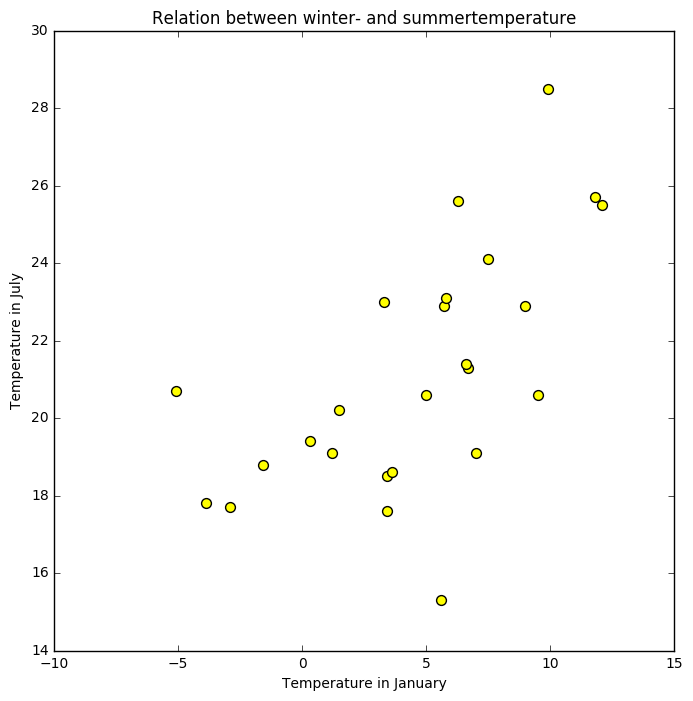

In [83]:
sns.reset_orig()
mpl.rcParams['font.size'] = 10.0
plt.figure(figsize = (8, 8))
plt.scatter(df.Temp_Jan, df.Temp_Jul, c = 'yellow', s=50)
plt.title('Relation between winter- and summertemperature')
plt.xlabel('Temperature in January')
plt.ylabel('Temperature in July')
plt.show()

We could display a third variable in this scatterplot. For example, it may be informative to make the dot diameters proportional to the population size. To do this, we could incorporate the variable <font color="red">df.Population</font> into the scatterplot. Using the parameters <font color="blue">facecolors</font> and <font color="blue">edgecolors</font>, empty circles are used in order to display any overlapping data.

In these data, there seems a slight tendency that the relatively smaller places are in lower temperature areas. For the present purpose, the data were not very well sampled and therefore may be biased. Most important here is to see how such a visualization gives insight in three dimensions at once.

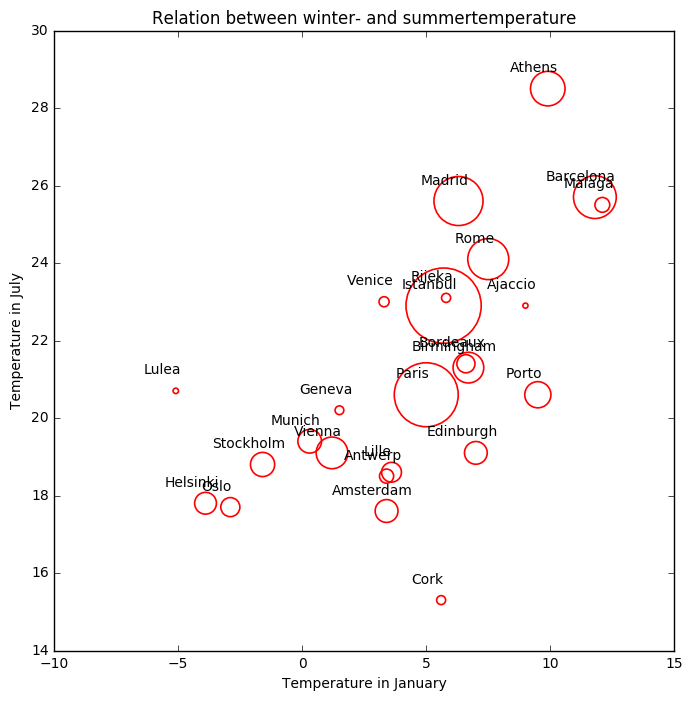

In [84]:
popsize = df.Population/5000

mpl.rcParams['font.size'] = 10.0
plt.figure(figsize = (8, 8))
plt.scatter(df.Temp_Jan, df.Temp_Jul, facecolors='none', edgecolors='red', linewidth=1.2, s=popsize)
plt.title('Relation between winter- and summertemperature')
plt.xlabel('Temperature in January')
plt.ylabel('Temperature in July')

for label, x, y in zip(df.Place, df.Temp_Jan, df.Temp_Jul):
    plt.annotate(
        label,
        xy=(x,y), xytext=(-10,10), textcoords='offset points', ha='center', va='bottom',  
    )
plt.show()

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q19">19. Replacing values</a>**

One of the most common data transformations is replacing values. The reason can be data entry errors, language differences (e.g., different labels are used for "Geneva", "Genève", "Genf" or "Ginebra"), or different conventions in other contexts. Values can be replaced by the following:

In [85]:
df=df.replace(['Catalan and Spanish'], ['Catalan / Spanish'])

In [86]:
df[df['Language'].str.contains('Cat')]

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population
4,Barcelona,11.8,25.7,Catalan / Spanish,12.0,NaT,4740000.0


The same is valid for numbers. 
To replace a value at a certain index use <font color="blue">df.iloc</font>. Take care that indexing in Python starts at 0, so that means that the first row/column is at 0, the second row/column at 1, etc. For example, <font color="gray">df.iloc[1,2]=17</font> would replace the value at the second row, third column with the value 17.

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q20">20. Data categorization</a>**

Another data transformation concerns making categories from numeric/integer values. Let us do that for example for temperature. The code underneath will categorize data in bins from -10 to -5, -5 to 0 etc. (which means that -5 would be in -10 to -5, -4.9 would be in category -5 to 0). In addition, we create some labels to reflect these categories. Of course, the labels are quite subjective. I met people in Sweden who find -5 Celsius comfortable, while this may be different for people from France.

In [87]:
tempbins = [-10, -5, 0, 5, 10, 15, 20, 25, 30]
templabels = ['Very low', 'Low', 'Reasonaby Low', 'Average', 'Reasonably High', 'High', 'Very High', 'Extremely High']

The following will create the categorized variables:

In [88]:
df['Temp_Jan_cat'] = pd.cut(df['Temp_Jan'], tempbins, labels = templabels)
df['Temp_Jul_cat'] = pd.cut(df['Temp_Jul'], tempbins, labels = templabels)

In [89]:
df.head(5)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jan_cat,Temp_Jul_cat
0,Ajaccio,9.0,22.9,French,38.0,NaT,68587.0,Average,Very High
1,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587.0,Reasonaby Low,High
2,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01 00:00:00,517042.0,Reasonaby Low,High
3,Athens,9.9,28.5,Greek,338.0,NaT,3090508.0,Average,Extremely High
4,Barcelona,11.8,25.7,Catalan / Spanish,12.0,NaT,4740000.0,Reasonably High,Extremely High


We can then count the number of observations for each category:

In [90]:
pd.value_counts(df['Temp_Jan_cat'])

Average            11
Reasonaby Low       8
Low                 3
Reasonably High     2
Very low            1
Extremely High      0
Very High           0
High                0
Name: Temp_Jan_cat, dtype: int64

In [91]:
pd.value_counts(df['Temp_Jul_cat'])

Very High          11
High               10
Extremely High      4
Reasonably High     0
Average             0
Reasonaby Low       0
Low                 0
Very low            0
Name: Temp_Jul_cat, dtype: int64

As we see the <font color="blue">pd.cut</font> function created a categorical variable.

In [92]:
df.dtypes

Place             object
Temp_Jan         float64
Temp_Jul         float64
Language          object
Altitude         float64
MeasureDate       object
Population       float64
Temp_Jan_cat    category
Temp_Jul_cat    category
dtype: object

The categorized data can be displayed by a histogram. Quite insightful is using overlapping histograms. The setting of <font color="blue">alpha = 0.5</font> means that the bars are transparant in case there is an overlap between categories; however in this case there is no overlap (in other words, all temperatures in July are different from those in January). The bins were set before by tempbins.

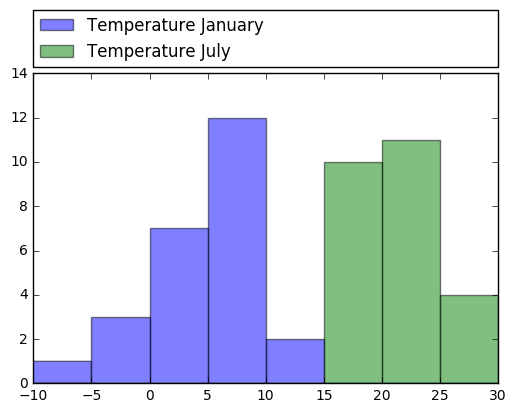

In [93]:
plt.hist(df['Temp_Jan'], alpha= 0.5, bins = tempbins, label='Temperature January')
plt.hist(df['Temp_Jul'], alpha= 0.5, bins = tempbins, label='Temperature July')
plt.ylim(0, 14)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

We may want to compute data as function of the categories. For example, given the temperature categories, is there a different mean precipitation? In Pandas there is a <font color="blue">groupby</font> function that can do this<sup>11</sup>. First let us see the categories:

In [94]:
df.groupby(['Temp_Jan_cat']).groups.keys()

['Extremely High',
 'Average',
 'High',
 'Very low',
 'Low',
 'Reasonaby Low',
 'Very High',
 'Reasonably High']

We can then inspect the first entry of every category:

In [95]:
df.groupby(['Temp_Jan_cat']).first()

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jul_cat
Temp_Jan_cat,,,,,,,,
Very low,Lulea,-5.1,20.7,Swedish,6.0,2014-12-31,75966.0,Very High
Low,Helsinki,-3.9,17.8,Finnish,23.0,2016-03-31,1231595.0,High
Reasonaby Low,Amsterdam,3.4,17.6,Dutch,-2.0,2016-01-01,1351587.0,High
Average,Ajaccio,9.0,22.9,French,38.0,2016-12-31,68587.0,Very High
Reasonably High,Barcelona,11.8,25.7,Catalan / Spanish,12.0,NaT,4740000.0,Extremely High
High,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
Very High,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
Extremely High,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


And now let's compute mean temperature in July as a function of the binned temperature in January:

In [96]:
df.groupby(['Temp_Jan_cat']).Temp_Jul.mean()

Temp_Jan_cat
Very low           20.700000
Low                18.100000
Reasonaby Low      19.625000
Average            22.254545
Reasonably High    25.600000
High                     NaN
Very High                NaN
Extremely High           NaN
Name: Temp_Jul, dtype: float64

If you actually want to view every variable as a function of <font color="red">Temp_Jan_cat</font>:

In [97]:
df.groupby(['Temp_Jan_cat']).mean()

,Temp_Jan,Temp_Jul,Altitude,Population
Temp_Jan_cat,,,,
Very low,-5.100000,20.700000,6.000000,7.596600e+04
Low,-2.800000,18.100000,11.500000,1.229565e+06
Reasonaby Low,2.712500,19.625000,-0.500000,2.249816e+06
Average,7.236364,22.254545,143.333333,3.203461e+06
Reasonably High,11.950000,25.600000,11.500000,2.654565e+06
High,NaN,NaN,NaN,NaN
Very High,NaN,NaN,NaN,NaN
Extremely High,NaN,NaN,NaN,NaN


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q21">21. Data conversions</a>**

Another data transformation is converting the values using a computation. For example, we may want to create a new variable that reflects the difference between temperatures in January and July. 

In [98]:
df.loc[:,"Tempdiff"]= df.loc[:,"Temp_Jan"]-df.loc[:,"Temp_Jul"]

Always make sure to inspect the result:

In [99]:
df[['Place','Temp_Jan', 'Temp_Jul', 'Tempdiff']].head(3)

,Place,Temp_Jan,Temp_Jul,Tempdiff
0,Ajaccio,9.0,22.9,-13.9
1,Amsterdam,3.4,17.6,-14.2
2,Antwerp,3.4,18.5,-15.1


A function can also be used to make a data conversion. For example, if we want to covert temperatures from Celsius into Fahrenheit, we need to make the following conversion<sup>12</sup>:
    *T(°F) = T(°C) x 9/5 + 32*.
If you only use this code once, you would probably do the following code, and it will give the new temperatures in Fahrenheit.

In [100]:
(df.Temp_Jan*9/5+32).head(3)

0    48.20
1    38.12
2    38.12
Name: Temp_Jan, dtype: float64

However, if the conversion will be used anywhere else again, you may probably want to write a function<sup>13</sup>. Briefly, you use <font color="blue">def</font> to define the function name including arguments. Do not forget the colon (:). Next line, after an indentation you define the desired transformation. 

In [101]:
def Tconv(x):
    y=x*9/5+32
    return y

The next step is then to check the function, for example using input temperature 32 °C. <font color="blue">Tconv(32)</font> gives an output of 89 °F.

In [102]:
Tconv(32)

89

So now it is time to convert a whole column to Fahrenheit:

Basically, the whole column is put in the function, and the output variable is directly written to the DataFrame.

In [103]:
df['Temp_JanF'] = Tconv(df['Temp_Jan'])
df['Temp_JulF'] = Tconv(df['Temp_Jul'])

In [104]:
df.head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF
0,Ajaccio,9.0,22.9,French,38.0,NaT,68587.0,Average,Very High,-13.9,48.20,73.22
1,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587.0,Reasonaby Low,High,-14.2,38.12,63.68
2,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01 00:00:00,517042.0,Reasonaby Low,High,-15.1,38.12,65.30


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q22">22. Merging data</a>**

Another operation that is quite frequently used is <font color="blue">merge</font>.
Note that this is different from <font color="blue">append</font> that we applied before, which only concatenated the rows of two dataframes. Now we are going to add a new column <font color="red">Prec_Jan</font>, reflecting precipitation (rainfall).   

In [105]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna', 'Stockholm', 'Oslo','Helsinki', 'Lulea', 'Edinburgh', 'Birmingham', 'Cork', 'Antwerp', 'Lille', 'Bordeaux', 'Malaga', 'Porto', 'Venice', 'Ajaccio', 'Rijeka', 'Istanbul', 'Rome'],
        'Prec_Jan': [66.6,43.7,53.7,76.0,48.0,56.9,21.3,39,54.9,52,34,67.5,73.2,131.4,69.3,60.5,87.3,69.0,147.1,47.0,56.7,128.7,105.0,66.9],
        }
df3 = pd.DataFrame(data, columns = ['Place', 'Prec_Jan'])

In [106]:
df3.head(3)

,Place,Prec_Jan
0,Amsterdam,66.6
1,Barcelona,43.7
2,Paris,53.7


We are going to use the Pandas function <font color="blue">pd.merge</font>. The columns of the two DataFrames are merged on <font color="blue">Place</font>, and the parameter <font color="blue">how='left'</font> means that dataset <font color="red">df</font> serves as base (missing values are filled with NaN). 

In [107]:
df = pd.merge(df, df3, how='left', on='Place')

In [108]:
df.head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF,Prec_Jan
0,Ajaccio,9.0,22.9,French,38.0,NaT,68587.0,Average,Very High,-13.9,48.20,73.22,56.7
1,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587.0,Reasonaby Low,High,-14.2,38.12,63.68,66.6
2,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01 00:00:00,517042.0,Reasonaby Low,High,-15.1,38.12,65.30,69.3


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q23">23. More scatterplots</a>**

We already explored the relation between temperature in January and July, using the scatterplot function. We are now going to plot the relation between temperature and precipitation in January. 

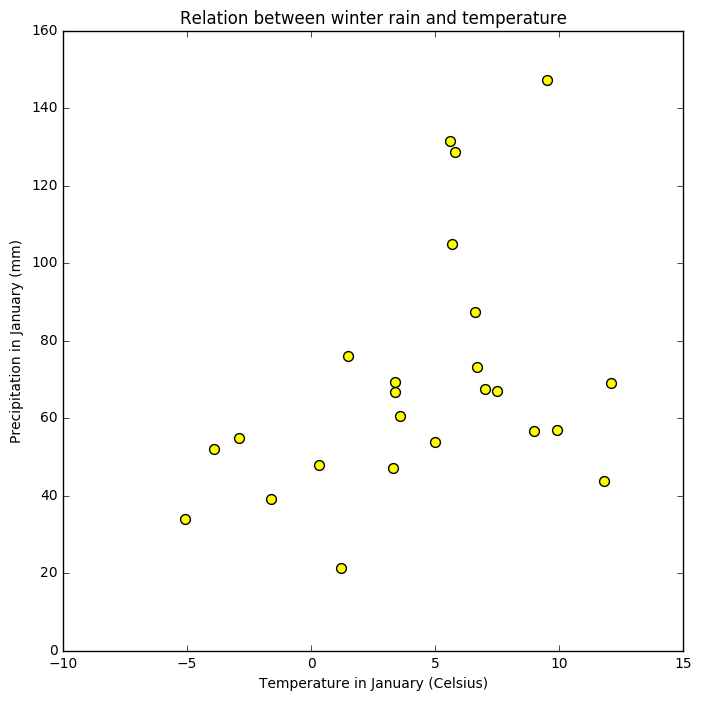

In [109]:
mpl.rcParams['font.size'] = 10.0
plt.figure(figsize = (8, 8))
plt.scatter(df.Temp_Jan, df.Prec_Jan, c = 'yellow', s=50)
plt.title('Relation between winter rain and temperature')
plt.xlabel('Temperature in January (Celsius)')
plt.ylabel('Precipitation in January (mm)')
plt.show()

Python offers several packages for data visualization. The following shows a similar scatterplot but now using Seaborn. It automatically adds a regression line to the plot. So what the data suggest is that when average temperatures were higher, the more rainfall there was in January.

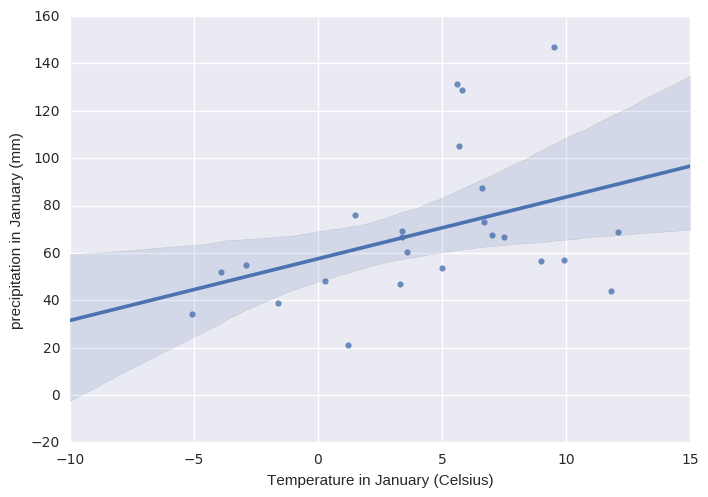

In [110]:
sns.set(color_codes=True)
ax = sns.regplot(x="Temp_Jan", y="Prec_Jan", data=df)
ax.set(xlabel='Temperature in January (Celsius)', ylabel='precipitation in January (mm)')
plt.show()

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q24">24. Geographical mapping</a>**

A geographic map can be made for these cities. For this purpose it would be nice to have coordinates, -- the longitude and latitude data --, for the different cities. The longitude is the distance east or west of the prime meridian (i.e., imaginary line from north to south through Greenwich, England). The latitude is the distance north or south of the equator. Both are measured in terms of the 360 degrees of a circle. 

In [111]:
data = {'Place': ['Amsterdam', 'Barcelona', 'Paris', 'Geneva', 'Munich', 'Athens', 'Vienna', 'Stockholm', 'Oslo', 'Helsinki', 'Lulea', 'Edinburgh', 'Birmingham', 'Cork', 'Antwerp', 'Lille', 'Bordeaux', 'Malaga', 'Porto', 'Venice', 'Ajaccio', 'Rijeka', 'Istanbul', 'Rome', 'Madrid'],
        'Lat': [52.38, 41.38, 48.86, 46.20, 48.15, 37.97, 48.2, 59.32, 59.95, 60.17, 65.58, 55.95, 52.48, 51.90, 51.22, 50.64, 44.84, 36.72, 41.13, 45.44, 41.93, 45.33, 41.01, 41.89, 40.43],
        'Long': [4.9, 2.18, 2.35, 6.14, 11.58, 23.72, 16.37, 18.07, 10.75, 24.94, 22.15, -3.19, -1.89, -8.48, 4.4, 3.06, -0.58, -4.42, -8.67, 12.33, 8.74, 14.44, 28.98, 12.49, -3.68]}

dfr = pd.DataFrame(data, columns = ['Place', 'Lat', 'Long'])

We merge the coordinates data with our available DataFrame. 

In [112]:
dfn = pd.merge(df, dfr, how='left', on='Place') # x=long, y=lat

As a next step we inspect some data:

In [113]:
dfn.head(3)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF,Prec_Jan,Lat,Long
0,Ajaccio,9.0,22.9,French,38.0,NaT,68587.0,Average,Very High,-13.9,48.20,73.22,56.7,41.93,8.74
1,Amsterdam,3.4,17.6,Dutch,-2.0,NaT,1351587.0,Reasonaby Low,High,-14.2,38.12,63.68,66.6,52.38,4.90
2,Antwerp,3.4,18.5,Dutch,NaN,2016-01-01 00:00:00,517042.0,Reasonaby Low,High,-15.1,38.12,65.30,69.3,51.22,4.40


We are then using Basemap for the geographical mapping. We do a straightforward map of the cities, with the diameter of circles reflecting the population size.

First, we need to use longitude and latitude data. It would therefore be good to identify the column <font color="red">Lat</font> and <font color="red">Long</font> *automatically*. This means, that the script should still work in the event we added or removed some of the columns. How to do that? The central part is using the function <font color="blue">np.where</font>, and to search for the variable name.

In [114]:
np.where([dfn.columns=='Long'])

(array([0]), array([14]))

In [115]:
dfn.columns

Index([u'Place', u'Temp_Jan', u'Temp_Jul', u'Language', u'Altitude',
       u'MeasureDate', u'Population', u'Temp_Jan_cat', u'Temp_Jul_cat',
       u'Tempdiff', u'Temp_JanF', u'Temp_JulF', u'Prec_Jan', u'Lat', u'Long'],
      dtype='object')

The following then writes for each variable name the index of the column.

In [116]:
longitude = np.where([dfn.columns=='Long'])[1].tolist()[0]
latitude = np.where([dfn.columns=='Lat'])[1].tolist()[0]
population = np.where([dfn.columns=='Population'])[1].tolist()[0]

In [117]:
print(longitude, latitude, population)

(14, 13, 6)


The three parameters, - <font color="red">longitude</font>, <font color="red">latitude</font>, and <font color="red">population</font> -, are used in the geographic plotting of the cities. Other code such as <font color="blue">Basemap()</font>, <font color="blue">drawmapboundary()</font>, <font color="blue">etopo()</font>, <font color="blue">drawcoastlines()</font>, <font color="blue">drawcountries()</font> are all used to set-up the European map.

(8.7400000000000002, 41.93)
(4.9000000000000004, 52.380000000000003)
(4.4000000000000004, 51.219999999999999)
(23.719999999999999, 37.969999999999999)
(2.1800000000000002, 41.380000000000003)
(-1.8899999999999999, 52.479999999999997)
(-0.57999999999999996, 44.840000000000003)
(-8.4800000000000004, 51.899999999999999)
(-3.1899999999999999, 55.950000000000003)
(6.1399999999999997, 46.200000000000003)
(24.940000000000001, 60.170000000000002)
(28.98, 41.009999999999998)
(3.0600000000000001, 50.640000000000001)
(22.149999999999999, 65.579999999999998)
(-4.4199999999999999, 36.719999999999999)
(11.58, 48.149999999999999)
(10.75, 59.950000000000003)
(2.3500000000000001, 48.859999999999999)
(-8.6699999999999999, 41.130000000000003)
(14.44, 45.329999999999998)
(18.07, 59.32)
(12.33, 45.439999999999998)
(16.370000000000001, 48.200000000000003)
(12.49, 41.890000000000001)


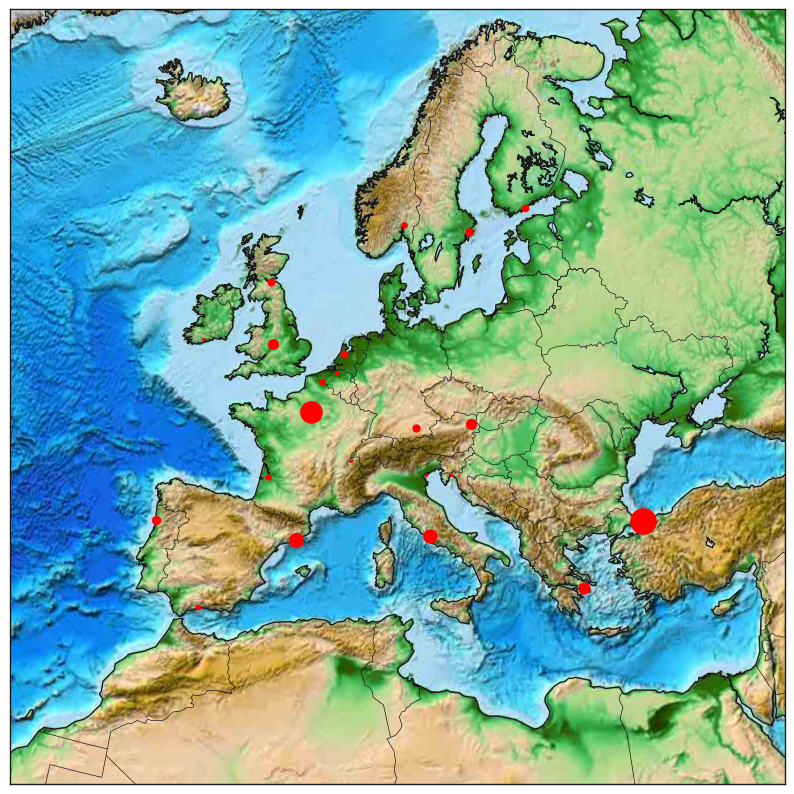

In [118]:
scale = 0.005

plt.figure(figsize=(10,10))
map = Basemap(projection='aeqd', lon_0 = 10, lat_0 = 50, width = 5000000, height = 5000000, resolution='l') # set res=h
map.drawmapboundary(fill_color='white')
map.etopo()
map.drawcoastlines()
map.drawcountries()

for i in range(0,len(dfn)-1):
        print(dfn.ix[i,longitude], dfn.ix[i,latitude])
        x, y = map(dfn.ix[i,longitude], dfn.ix[i,latitude])
        map.plot(x,y,marker='o', color='Red', markersize=int(math.sqrt(dfn.ix[i,population]))*scale)
plt.show()

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q25">25. Lineplots</a>**

Temperatures may differ given the longitude and latitude coordinates of the cities, and this is what we may inspect visually. Such a relationship between these coordinates and temperatures could be displayed with lineplots. It should be said in advance that strictly spoken it is not correct to use lineplots in this case, as the measures inbetween the single coordinates are unknown (actually NaNs, so we may not assume it to be linear inbetween). However, for this tutorial we accept this criticism as less important than the exploratory insight that these lineplot offer.

We start with the longitude data. A negative longitude means West of the prime meridian.
To get a valid display of data, it needs to be sorted:

In [119]:
dfn = dfn.sort_values(by='Long')

In [120]:
dfn.Long.head(5)

18   -8.67
7    -8.48
14   -4.42
24   -3.68
8    -3.19
Name: Long, dtype: float64

We then use the <font color="blue">plot</font> function in Matplotlib. At first sight there seems no special trend, though it should be said that we only have few datapoints available.

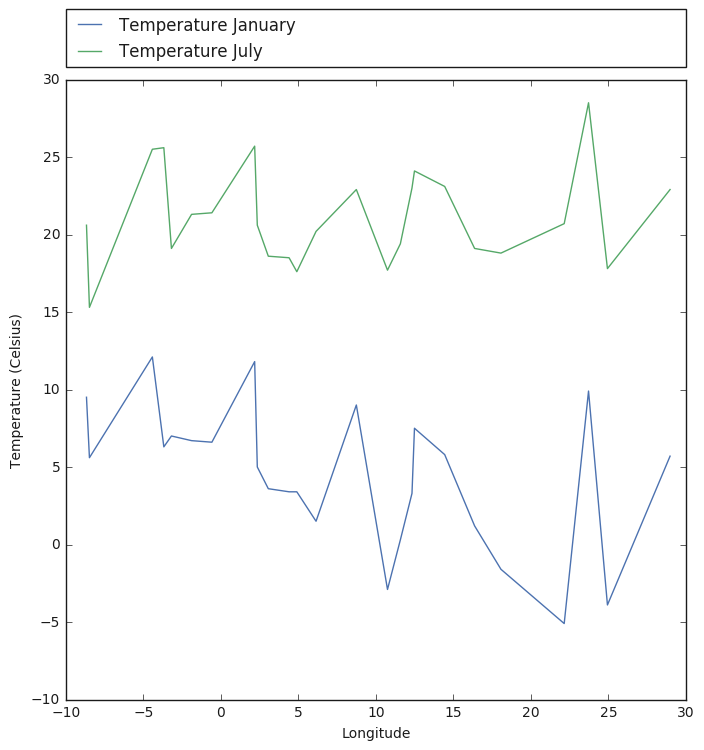

In [121]:
sns.reset_orig()
plt.figure(figsize = (8, 8))
plt.plot(dfn.Long, dfn.Temp_Jan)
plt.plot(dfn.Long, dfn.Temp_Jul)
plt.xlabel('Longitude')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Temperature January','Temperature July'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

We do something similar for the latitude data. So we start sorting the data given the latitude. Note by the way that all values are positive, which is as expected, because all European cities are north of the equator.  

In [122]:
dfn = dfn.sort_values(by='Lat')

In [123]:
dfn.Lat.head(5)

14    36.72
3     37.97
24    40.43
11    41.01
18    41.13
Name: Lat, dtype: float64

We again use the <font color="blue">plot</font> function. As may be expected, there is a trend that southern cities have higher temperatures in January and July. Again, of course more data would be needed.

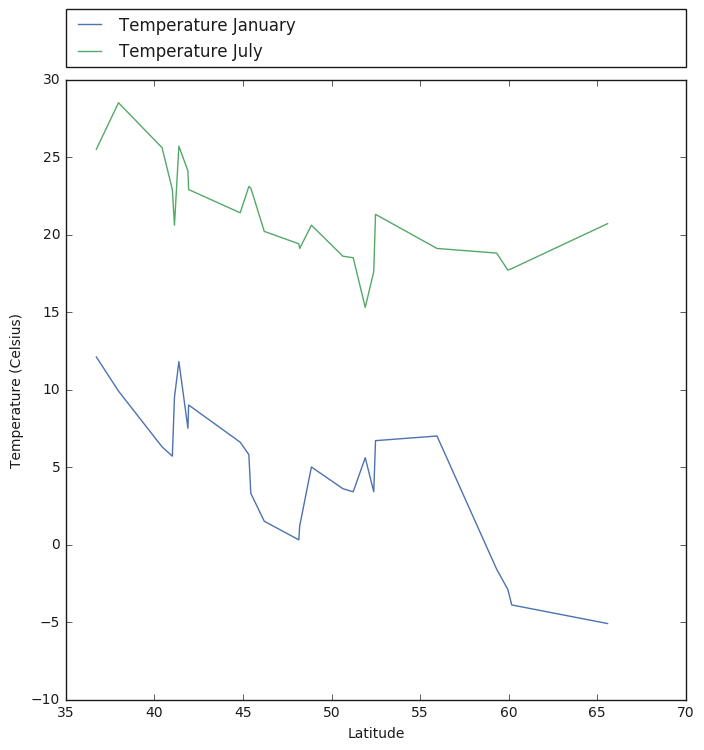

In [124]:
plt.figure(figsize = (8, 8))
plt.plot(dfn.Lat, dfn.Temp_Jan)
plt.plot(dfn.Lat, dfn.Temp_Jul)
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Temperature January','Temperature July'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q26">26. Remove rows and columns</a>**

To keep data organized and manageable, sometimes unneeded data need to be removed. So let us practice how to use the <font color="blue">del</font> function to delete data.

Remove the column <font color="red">MeasureDate</font> . So let us check again *before* the removal:

In [125]:
dfn.head(2)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,MeasureDate,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF,Prec_Jan,Lat,Long
14,Malaga,12.1,25.5,Spanish,11.0,NaT,569130.0,Reasonably High,Extremely High,-13.4,53.78,77.9,69.0,36.72,-4.42
3,Athens,9.9,28.5,Greek,338.0,NaT,3090508.0,Average,Extremely High,-18.6,49.82,83.3,56.9,37.97,23.72


Here is the <font color="blue">del</font> command.

In [126]:
del dfn['MeasureDate']

Now let us see the DataFrame *after* removal of a column.

In [127]:
dfn.head(2)

,Place,Temp_Jan,Temp_Jul,Language,Altitude,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF,Prec_Jan,Lat,Long
14,Malaga,12.1,25.5,Spanish,11.0,569130.0,Reasonably High,Extremely High,-13.4,53.78,77.9,69.0,36.72,-4.42
3,Athens,9.9,28.5,Greek,338.0,3090508.0,Average,Extremely High,-18.6,49.82,83.3,56.9,37.97,23.72


If you want to remove the first column (index=0) and third column (index=2). To make this definitive, the result needs to be written to the object <font color="red">dfn</font>, such as <font color="gray">dfn = dfn.drop(dfn.columns[[0,2]], axis=1)</font>.

In [128]:
dfn.drop(dfn.columns[[0,2]], axis=1).head(2)

,Temp_Jan,Language,Altitude,Population,Temp_Jan_cat,Temp_Jul_cat,Tempdiff,Temp_JanF,Temp_JulF,Prec_Jan,Lat,Long
14,12.1,Spanish,11.0,569130.0,Reasonably High,Extremely High,-13.4,53.78,77.9,69.0,36.72,-4.42
3,9.9,Greek,338.0,3090508.0,Average,Extremely High,-18.6,49.82,83.3,56.9,37.97,23.72


[<font color="gray">▲▲▲</font>](#contents)

## **<a name="q27">27. Save DataFrame</a>** 

We are going to save the DataFrame to a file with extension .csv. We name the file <font color="red">dfn</font> including date in the filename, to always have a previous backup available. Of course, you can remove the date part if you like.

In [129]:
datestring = datetime.strftime(datetime.now(), '%Y-%m-%d')
datestring
dfn.to_csv('dfn-'+datestring+'.csv', sep=",")

The file can be found back in the following directory:

In [130]:
os.getcwd()

'/home/mark/Dokumente/Ruthger/Python'

[<font color="gray">▲▲▲</font>](#contents)

## **Closing words**

Python offers excellent flexible solutions. The goal of this tutorial was to give a broad scope of preprocessing and visualizations while at the same time avoiding too much detail and long chapters as can be found in books. For this reason I have presented diverse preprocessing steps and data visualization packages such as Matplotlib, Seaborn, and Plotly. 

By no means this guide is exhaustive. If you feel that something essential is missing in this guide, if you discovered an error, if you have remarks, if you have ideas about other city data that are interesting for analysis, or if you just like to say <font color="orange">hello</font> and get in contact, please do not hesitate to drop a message: <font color="blue">rrighart@googlemail.com</font>

I am looking forward to hearing from you! 

**Note**: Please make sure to check this site regularly for possible updates. 


[<font color="gray">▲▲▲</font>](#contents)

## **References**

1. Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
2. Installation guide for Jupyter: https://jupyter.readthedocs.io/en/latest/install.html#install
3. Formatting decimals: http://stackoverflow.com/questions/31700691/convert-commas-to-dots-within-a-dataframe
4. Pandas concat: http://pandas.pydata.org/pandas-docs/stable/merging.html
5. Missing values: http://pandas.pydata.org/pandas-docs/stable/missing_data.html
6. Refrain from chained indexing: https://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe
7. Reset Seaborn layout: https://stackoverflow.com/questions/26899310/python-seaborn-to-reset-back-to-the-matplotlib
8. Legend: https://matplotlib.org/users/legend_guide.html
9. Colors in pie plot: http://stackoverflow.com/questions/21034830/how-can-i-generate-more-colors-on-pie-chart-matplotlib
10. Starting with Plotly: https://plot.ly/python/getting-started/
11. Group by in Pandas: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
12. Temperature conversion: http://www.rapidtables.com/convert/temperature/how-celsius-to-fahrenheit.htm
13. Nice intro about writing functions: http://www.pythonlearn.com/html-008/cfbook005.html

[<font color="gray">▲▲▲</font>](#contents)